# SPRINT 8 - TASCA 1:

## Nivel 1
Realitza la connexió en Python amb el MySQL Workbench per a carregar tota la informació que tens en les taules.

Realitzaràs una visualització per a cada exercici. Comenta el que et crida l'atenció de graficar aquesta variable, justifica l'elecció del gràfic i interpreta els resultats en funció de les teves dades.

In [1]:
# Crearemos una conexión con la DB de MySQL mediante la creación de un diccionario de DataFrames
# Primero, installamos las bibliotecas que utilizaremos en la terminal con pip install
# Luego, importamos las librerías necesarias
import pandas as pd
from sqlalchemy import create_engine

# Conectamos a la base de datos
host ='localhost'
database='transactionsT4'
user='root'
password='4443'

# Creamos una cadena de conexión
cadena_conexion = f'mysql+mysqlconnector://{user}:{password}@{host}/{database}'

# Creamos el motor de conexión
motor = create_engine(cadena_conexion)

# Creamos una lista de las tablas a cargar
nombres_tablas = ['transactions', 'credit_cards', 'companies', 'products_per_transactions', 'products', 'users_all']

# Creamos un diccionario para almacenar los DataFrames
dataframes = {}

# Con un bucle for leemos cada tabla en un DataFrame y lo almacenamos en el diccionario
for nombre in nombres_tablas:
    query = f'SELECT * FROM {nombre}'
    dataframes[nombre] = pd.read_sql(query, con=motor)

# Para verificar la carga correcta, accedemos a las primeras 5 filas del DataFrame de la tabla Transactions almacenado en el diccionario
df_transactions = dataframes['transactions']
df_transactions.head()


,id,card_id,business_id,fecha_hora,amount,declined,products_ids,user_id,lat,longitude
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:00,466.92,0,"71, 1, 19",92,819.184.589.824,-125.275.561.984
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:00,49.53,0,"47, 97, 43",170,-439.694.885.888,-1.175.251.835.904
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:00,92.61,0,"47, 67, 31, 5",275,-81.222.680.576,-129.049.879.552
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:00,394.18,0,"89, 83, 79",265,-343.593.055.232,-100.555.928.064
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:00,279.93,0,"43, 31",92,337.381.445.632,158.298.210.304


#### Verificamos la carga de los DataFrames

In [2]:
for nombre, df in dataframes.items():
    print(f'\nVerificación del DataFrame de la tabla: {nombre}')
        
    # Mostramos las primeras filas
    print(f'Primeras filas de {nombre}:\n', df.head(), '\n')
        
    # Comprobamos la forma (shape)
    print(f'Shape de {nombre}:', df.shape, '\n')
        
    # Mostramos el esquema
    print(f'Info de {nombre}:')
    df.info()
    print('\n')
        
    # Resumen estadístico
    print(f'Descripción de {nombre}:\n', df.describe(), '\n')



Verificación del DataFrame de la tabla: transactions
Primeras filas de transactions:
                                      id   card_id business_id  \
0  02C6201E-D90A-1859-B4EE-88D2986D3B02  CcU-2938      b-2362   
1  0466A42E-47CF-8D24-FD01-C0B689713128  CcU-4219      b-2302   
2  063FBA79-99EC-66FB-29F7-25726D1764A5  CcU-2987      b-2250   
3  0668296C-CDB9-A883-76BC-2E4C44F8C8AE  CcU-3743      b-2618   
4  06CD9AA5-9B42-D684-DDDD-A5E394FEBA99  CcU-2959      b-2346   

           fecha_hora  amount  declined   products_ids  user_id  \
0 2021-08-28 23:42:00  466.92         0      71, 1, 19       92   
1 2021-07-26 07:29:00   49.53         0     47, 97, 43      170   
2 2022-01-06 21:25:00   92.61         0  47, 67, 31, 5      275   
3 2022-01-26 02:07:00  394.18         0     89, 83, 79      265   
4 2021-10-26 23:00:00  279.93         0         43, 31       92   

                lat           longitude  
0   819.184.589.824    -125.275.561.984  
1  -439.694.885.888  -1.175.251.835

## Ejercicio 1: Una variable numérica

Escogemos graficar el campo id_products de la tabla products_per_transactions para poder ver el id de los productos más vendidos.
Seleccionamos un histograma de lineas para la visualización ya que son muchos datos (100 productos).

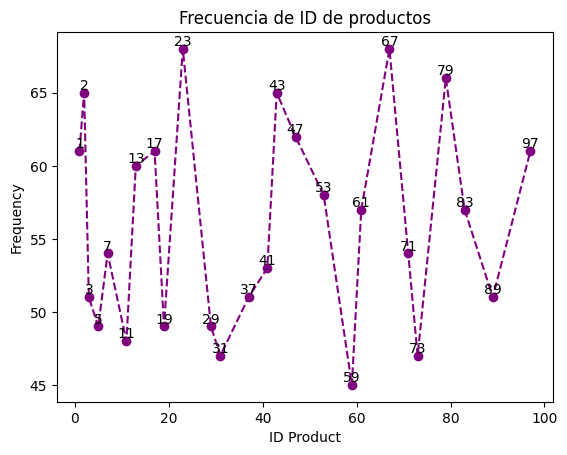

In [3]:
# Importamos librerías
import matplotlib.pyplot as plt
import pandas as pd

# Obtenemos los datos de los campos 'id_product' de la tabla 'product_per_transactions'
id_product = dataframes['products_per_transactions']['id_product']

# Contamos las ocurrencias de cada id_product y las ordenamos para que estén ascendentes
product_counts = id_product.value_counts().sort_index()

# Creamos el gráfico de líneas
plt.plot(product_counts.index, product_counts.values, marker='o', linestyle='--', color='purple')

# Añadimos etiquetas a cada punto del histograma lineal
for i, id in enumerate(product_counts.index):
    plt.text(id, product_counts.values[i], str(id), ha='center', va='bottom')

# Añadimos etiquetas y título
plt.xlabel('ID Product')  # Etiqueta para el eje x
plt.ylabel('Frequency')   # Etiqueta para el eje y
plt.title('Frecuencia de ID de productos')

# Mostramos el gráfico
plt.show()

**Interpretación:**
*En este gráfico podemos observar que los 5 productos más vendidos son los de ID: 2, 23, 43, 67 y 79.
Mientras que los 5 menos vendidos son los de ID: 59, 73, 32, 11 y 19.
En base a estos datos podría recomendarse, por ejemplo, fabricar más de los productos más demandados y discontinuar o promocionar los menos demandados.*

## Ejercicio 2: dos variables numéricas

Seleccionamos las variables precio y peso, para ver si existe alguna relación entre ellas. Realizaremos un gráfico de dispersión.

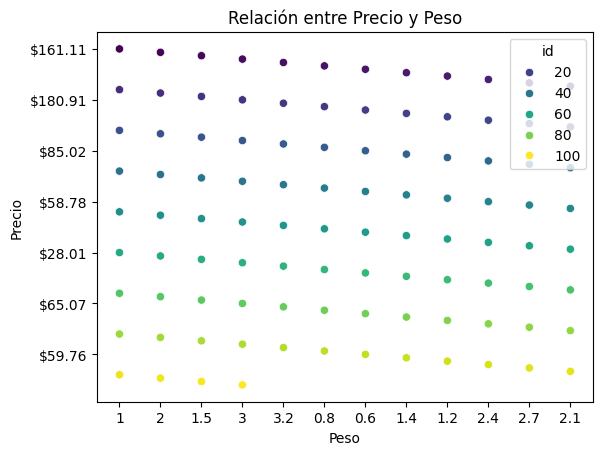

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.ticker import MaxNLocator

# Obtenemos los datos de los campos 'precio'y 'peso' de la tabla 'products'
# Al graficar y ver que no había una relación lineal añadimos la variable id de producto a los colores para ver si esto ayudaba a explicar la relación.
precio = dataframes['products']['price']
peso = dataframes['products']['weight']
id_p = dataframes['products']['id']

# Creamos el gráfico de dispersión con Seaborn
sns.scatterplot(x=peso, y=precio, hue=id_p, palette='viridis')

# Añadimos etiquetas y título
plt.xlabel('Peso')       # Etiqueta para el eje x
plt.ylabel('Precio')     # Etiqueta para el eje y
plt.title('Relación entre Precio y Peso')

# Controlamos la densidad de las etiquetas del eje y para mejorar la legibilidad
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=10))

# Mostramos el gráfico
plt.show()

**Interpretación:**
*Este gráfico muestra la relación entre el precio y el peso de los productos, con los puntos coloreados según el ID del producto. 
Del gráfico podemos inferir que hay 12 categorías de peso diferentes entre los productos. Pero que no hay una relación lineal entre peso y precio, ya que los puntos no siguen una tendencia ascendente o descendente obvia. También podemos observar que los precios oscilan entre aproximadamente $28 y $180, mientras que los pesos varían entre aproximadamente 0.6 y 3.2. 
Los productos con diferentes ID están dispersos por todo el rango del gráfico, lo que sugiere que el ID no está correlacionado con una combinación específica de peso y precio. La falta de una relación clara entre el peso y el precio podría indicar que otros factores no representados en este gráfico (como la calidad del material, la marca, las características adicionales, etc.) están influyendo en el precio de los productos.*

## Ejercicio 3: Una variable categòrica.

Escogemos hacer un gráfico de la variable country. Como son poco valores haremos un gráfico de barras y como es una variable categórica utilizaremos la librería seaborn ya que tiene la función countplot que es específica para contar la frecuencia de cada categoría.

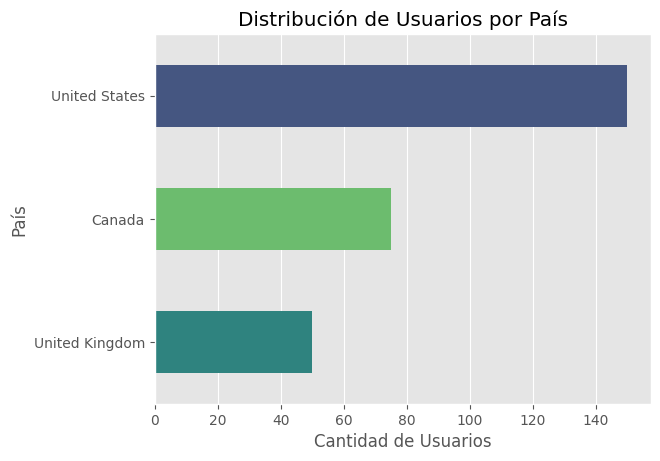

In [25]:
# Importamos las librerías
import seaborn as sns
import matplotlib.pyplot as plt

# Obtenemos los datos de los países
paises = dataframes['users_all']['country']

# Creamos el gráfico de conteo, ordenando las barras según frecuencia de mayor a menor
sns.countplot(y=paises, order=paises.value_counts().index, palette='viridis', width=0.5, hue=paises)

# Añadimos etiquetas y título
plt.xlabel('Cantidad de Usuarios')
plt.ylabel('País')
plt.title('Distribución de Usuarios por País')

# Mostramos el gráfico
plt.show()

**Interpretación:** *En este gráfico de barras podemos ver la cantidad de usuarios según países ordenados de mayor a menor. Estados Unidos es el país que cuenta con mayor cantidad de clientes, superando los 140. Le sigue Canadá con más de 60 clientes y luego Reino Unido con poco más de 40 clientes. Basándonos en este gráfico podríamos recomendar aumentar la presencia y/o realizar promociones o campañas de marketing en Reino Unido para mejorar su participación en las transacciones.*

## Ejercicio 4: Una variable categórica y una numérica.

Escojemos id_transaction(products_per_transactions) y product_name(products). Para ver cuantas transacciones hay por producto haremos un gráfico de pastel.



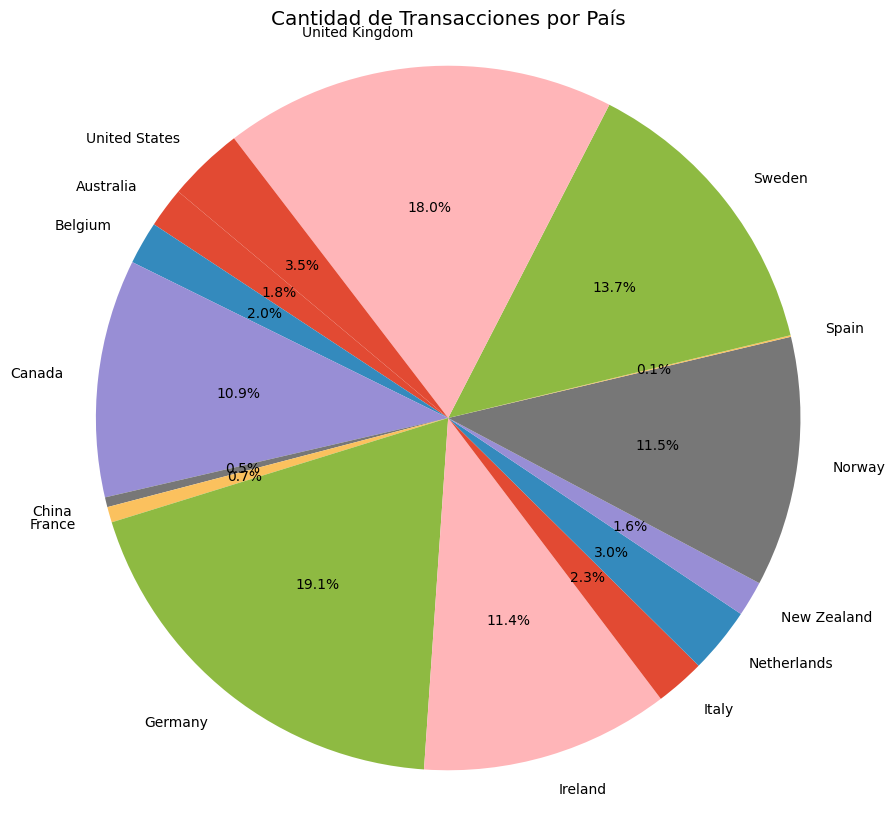

In [64]:
import matplotlib.pyplot as plt
import pandas as pd

transactions = dataframes['transactions']
companies =dataframes['companies']

# Fusionamos las tablas 'transactions' y 'companies' en una sola tabla utilizando los campos 'business_id' y 'company_id'
datos = pd.merge(transactions, companies, how='inner', left_on='business_id', right_on='company_id')

# Agrupamos los datos por país y calculamos la suma de las transacciones para cada país
transacciones_por_pais = datos.groupby('country')['amount'].sum()

# Creamos el gráfico de pastel
plt.figure(figsize=(10, 10))  # Ajustamos el tamaño de la figura 
plt.pie(transacciones_por_pais, labels=transacciones_por_pais.index, autopct='%1.1f%%', startangle=140)


# Añadimos etiquetas y título
plt.title('Cantidad de Transacciones por País')

# Mostramos el gráfico
plt.axis('equal')  # Asegura que el gráfico de pastel sea un círculo
plt.show()

**Interpretación**: *